# Seaborn - Basic
## Memorandum for myself

In [60]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

### Datasets

In [18]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

### 1. Distribution Plots

#### Histogram (distplot)
Draws histogram and kde by default

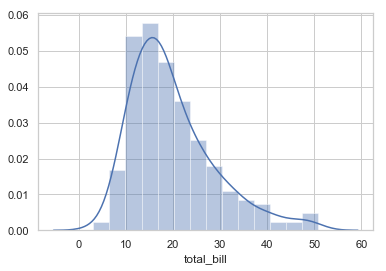

In [3]:
sns.distplot(tips["total_bill"])
plt.show()

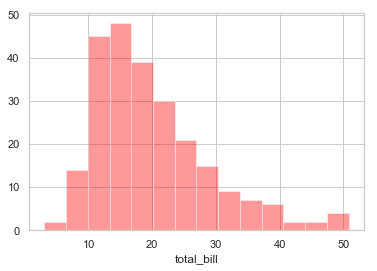

In [4]:
sns.distplot(tips.total_bill, kde=False, color="red")
plt.show()

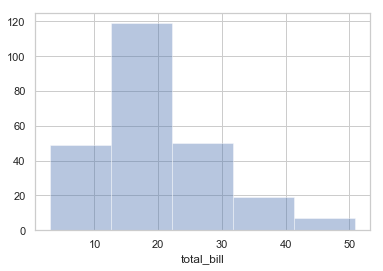

In [5]:
sns.distplot(tips.total_bill, kde=False, bins=5)
plt.show()

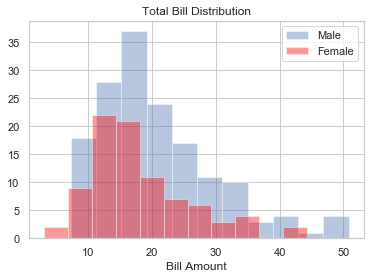

In [6]:
sns.distplot(tips[tips.sex == "Male"].total_bill, kde=False, label = "Male")
sns.distplot(tips[tips.sex == "Female"].total_bill, kde=False, color="red", label = "Female")

# Add Title and Axis Label
plt.title("Total Bill Distribution")
plt.xlabel("Bill Amount")

# Add Legend
plt.legend()

plt.show()

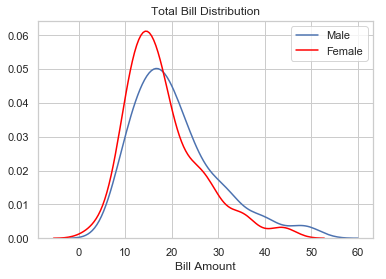

In [7]:
sns.distplot(tips[tips.sex == "Male"].total_bill, hist=False, label = "Male")
sns.distplot(tips[tips.sex == "Female"].total_bill, hist=False, color="red", label = "Female")

# Add Title and Axis Label
plt.title("Total Bill Distribution")
plt.xlabel("Bill Amount")

# Add Legend
plt.legend()

plt.show()

### 2. Relational Plots

#### Scatter Plot (scatterplot)

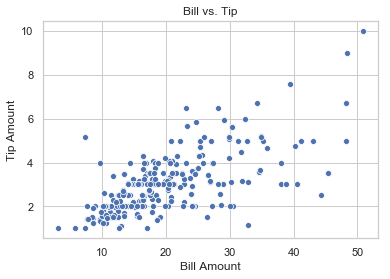

In [28]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

# Add Title and Axis Label
plt.title("Bill vs. Tip")
plt.xlabel("Bill Amount")
plt.ylabel("Tip Amount")

plt.show()

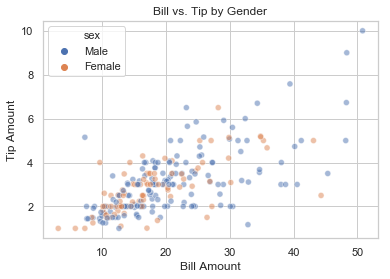

In [29]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex", alpha = 0.5)

# Add Title and Axis Label
plt.title("Bill vs. Tip by Gender")
plt.xlabel("Bill Amount")
plt.ylabel("Tip Amount")

plt.show()

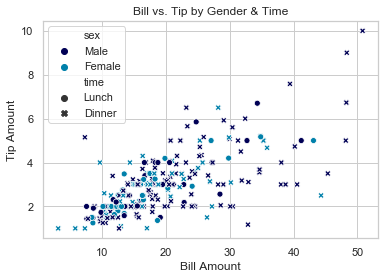

In [30]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex", palette="ocean", style="time")

# Add Title and Axis Label
plt.title("Bill vs. Tip by Gender & Time")
plt.xlabel("Bill Amount")
plt.ylabel("Tip Amount")

plt.show()

#### Joint Plot (jointplot)
Draws scatter and distribution at the same time

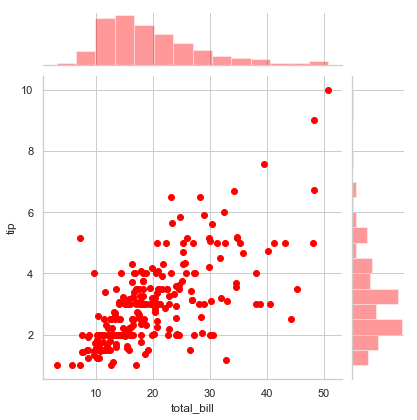

In [114]:
sns.jointplot(x="total_bill", y="tip", data=tips, color="red")
plt.show()

Some other options for joint plot

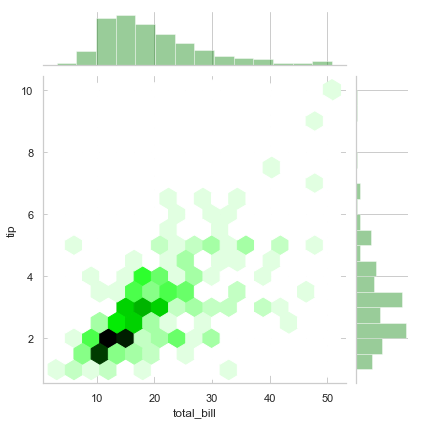

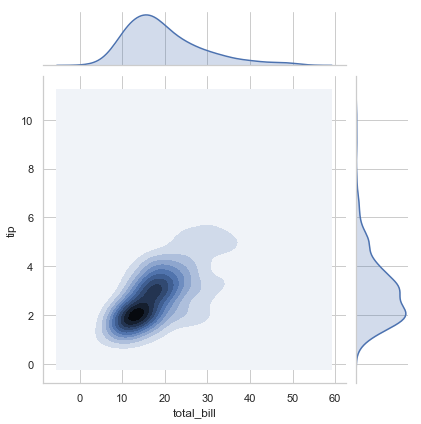

In [12]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind = "hex", color = "green")
sns.jointplot(x="total_bill", y="tip", data=tips, kind = "kde")
plt.show()

Add tile and Axis Labels

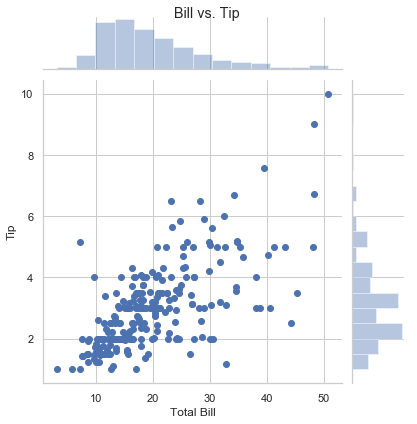

In [118]:
g = sns.jointplot(x="total_bill", y="tip", data=tips)

# Add Title and Axis Label
plt.suptitle('Bill vs. Tip')
g.ax_joint.set_xlabel('Total Bill')
g.ax_joint.set_ylabel('Tip')

plt.show()

#### Pair Plot (pairplot)
Draws scatter and distribution for all numerical variable pairs in the dataset

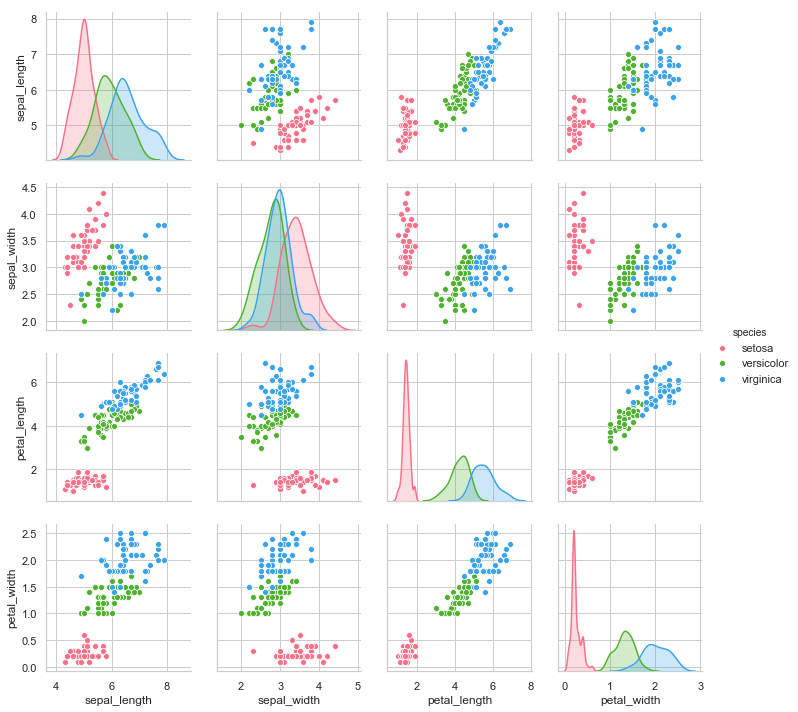

In [34]:
sns.pairplot(iris, hue="species", palette="husl")
plt.show()

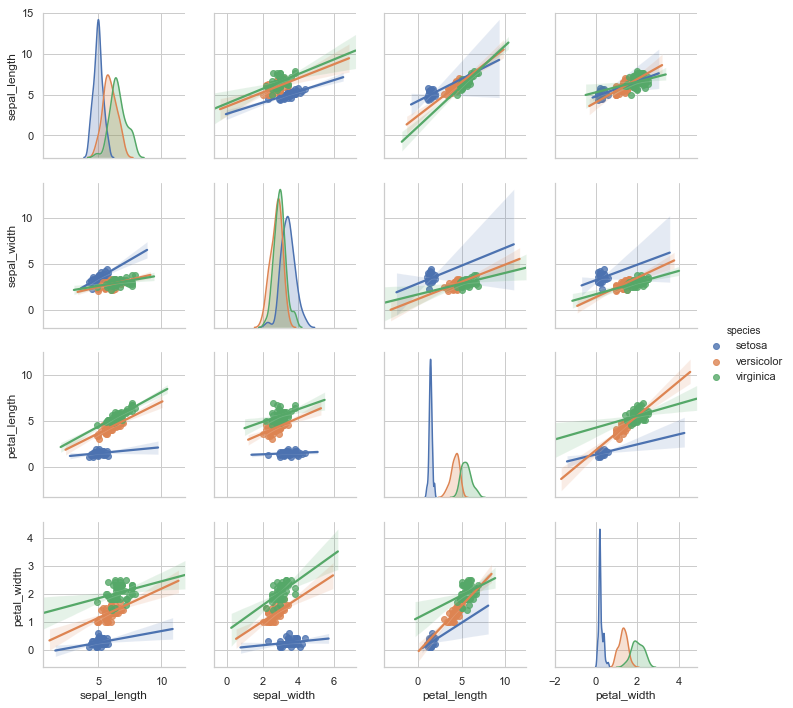

In [107]:
sns.pairplot(iris, hue="species", kind="reg", diag_kind="kde")
plt.show()

### 3. Categorical Plots

#### Box Plot (boxplot)

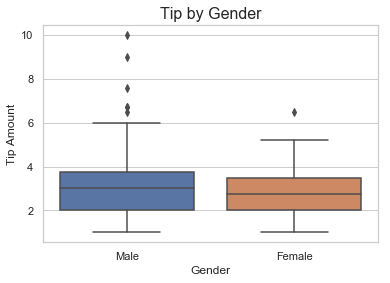

In [37]:
sns.boxplot(x="sex", y="tip", data=tips)

# Add Title and Axis Label
plt.title("Tip by Gender", size = 16)
plt.xlabel("Gender")
plt.ylabel("Tip Amount")

plt.show()

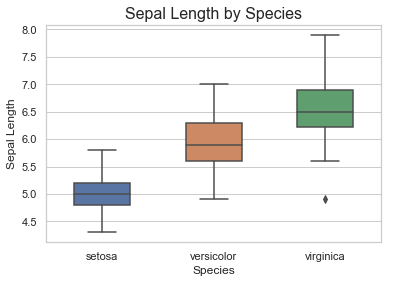

In [38]:
sns.boxplot(x="species", y="sepal_length", data=iris, width = 0.5)

# Add Title and Axis Label
plt.title("Sepal Length by Species", size = 16)
plt.xlabel("Species")
plt.ylabel("Sepal Length")

plt.show()

Horizontal version

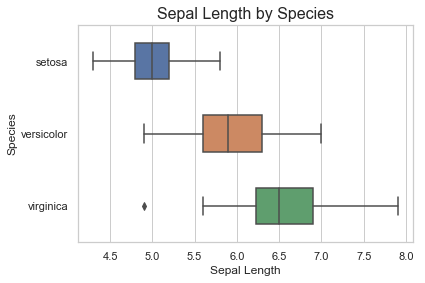

In [39]:
sns.boxplot(x="sepal_length", y="species", data=iris, width = 0.5)

# Add Title and Axis Label
plt.title("Sepal Length by Species", size = 16)
plt.xlabel("Sepal Length")
plt.ylabel("Species")

plt.show()

#### Violin Plot (violinplot)

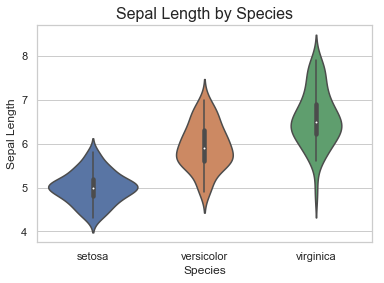

In [40]:
sns.violinplot(x="species", y="sepal_length", data=iris)

# Add Title and Axis Label
plt.title("Sepal Length by Species", size = 16)
plt.xlabel("Species")
plt.ylabel("Sepal Length")

plt.show()

#### Swarm Plot (swarmplot)

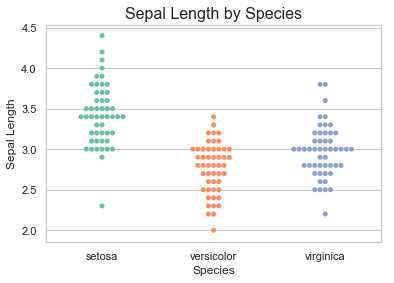

In [41]:
sns.swarmplot(x="species", y="sepal_width", data=iris, palette="Set2")

# Add Title and Axis Label
plt.title("Sepal Width by Species", size = 16)
plt.xlabel("Species")
plt.ylabel("Sepal Length")

plt.show()

#### Boxen Plot (boxenplot)

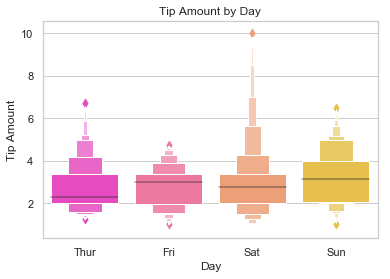

In [43]:
sns.boxenplot(x="day", y="tip", data=tips, palette="spring")

# Add Title and Axis Label
plt.title("Tip Amount by Day")
plt.xlabel("Day")
plt.ylabel("Tip Amount")

plt.show()

#### Bar Plot (barplot)

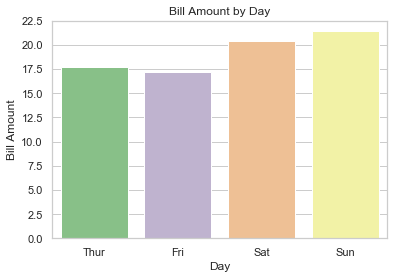

In [44]:
sns.barplot(x="day", y="total_bill", data=tips, palette="Accent", ci=None)

# Add Title and Axis Label
plt.title("Bill Amount by Day")
plt.xlabel("Day")
plt.ylabel("Bill Amount")

plt.show()

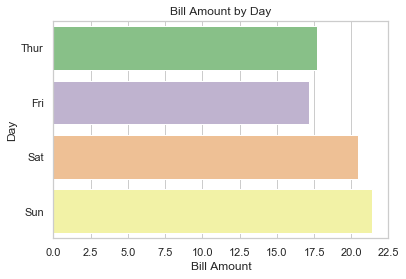

In [45]:
sns.barplot(x="total_bill", y="day", data=tips, palette="Accent", ci=None)

# Add Title and Axis Label
plt.title("Bill Amount by Day")
plt.xlabel("Bill Amount")
plt.ylabel("Day")

plt.show()

## 4. Facetting

#### FacetGrid

Create a grid object and set column and/or row first 

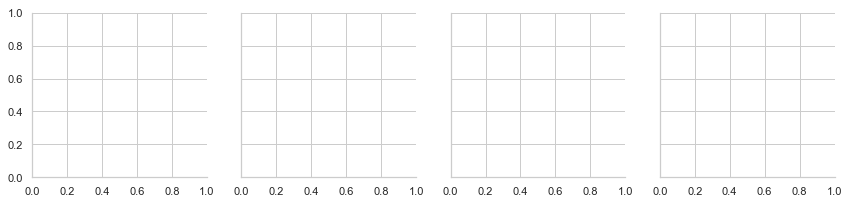

In [82]:
g = sns.FacetGrid(tips, col="day")

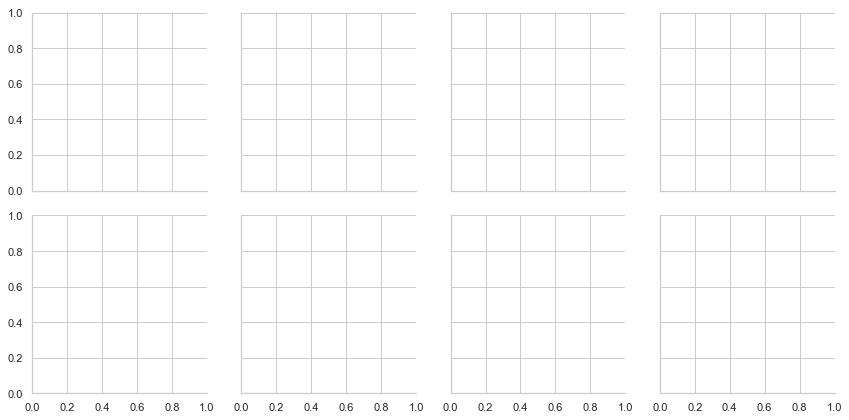

In [80]:
g = sns.FacetGrid(tips, col="day", row="sex")

Then plot the data by map() method 

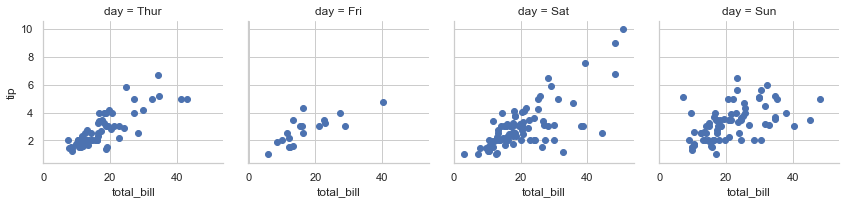

In [94]:
g = sns.FacetGrid(tips, col="day")
g = g.map(plt.scatter, "total_bill", "tip")

Colored by Gender factor

There are some methods like:       
add_legend()      
set_xlabels()     
set_ylabels()     



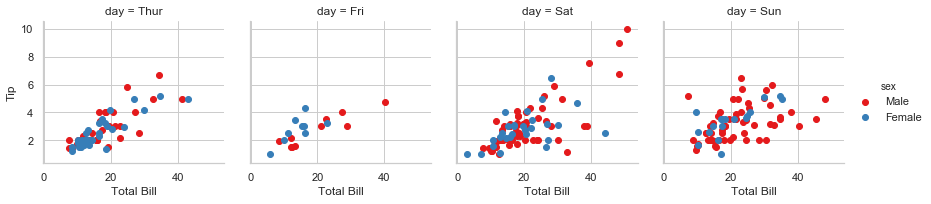

In [99]:
g = sns.FacetGrid(tips, col="day", hue="sex", palette="Set1")
g = (g.map(plt.scatter, "total_bill", "tip")
  .add_legend()
  .set_xlabels("Total Bill")
  .set_ylabels("Tip"))

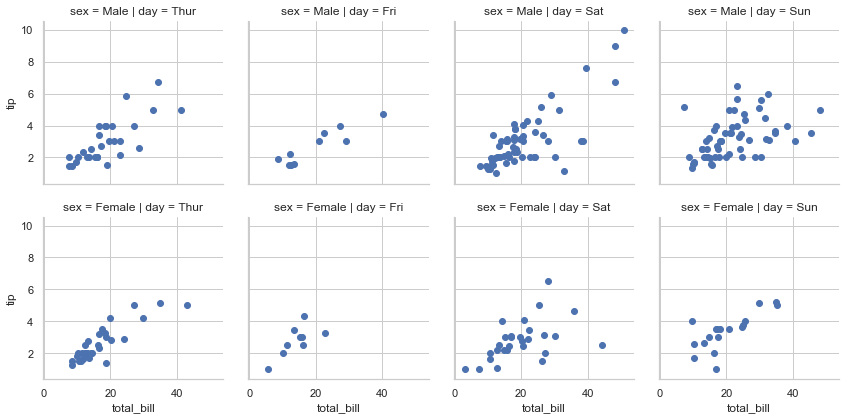

In [81]:
g = sns.FacetGrid(tips, col="day", row="sex")
g = g.map(plt.scatter, "total_bill", "tip")

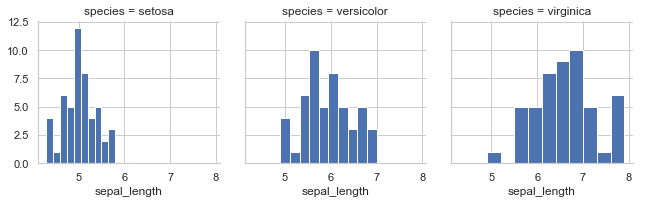

In [74]:
g = sns.FacetGrid(iris, col="species",)
g = g.map(plt.hist, "sepal_length")

Need to manually set up bin width to make it same for all grids

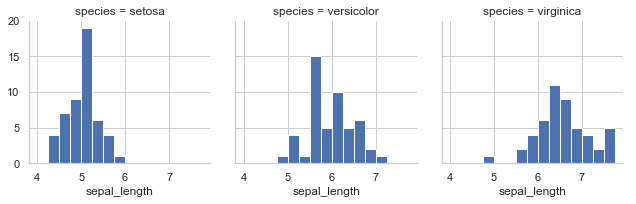

In [79]:
import numpy as np
g = sns.FacetGrid(iris, col="species",)
g = g.map(plt.hist, "sepal_length", bins = np.arange(4,8,0.25))